## Lab06 - Data preprocessing I
Name: Anh Kieu  
Class: CSCI 349 - Intro to Data Mining  
Semester: Spring 2021  
Instructor: Brian King  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1) Read data from CSV file.

In [2]:
df_temps = pd.read_csv("../data/faa_hourly-KIPT_20000101-20201231.csv", skiprows = 16)

In [3]:
df_temps.head()

,Date/Time (GMT),Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph),Unnamed: 13
0,2000-01-01 00:00:00,1,26.1,26.1,26.1,14.0,NaN,20.7,59.0,17.3,1015.2,280.0,17.3,NaN
1,2000-01-01 01:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,16.1,1015.9,280.0,16.1,NaN
2,2000-01-01 02:00:00,1,26.1,26.1,26.1,15.1,NaN,NaN,62.0,15.0,1016.3,280.0,15.0,NaN
3,2000-01-01 03:00:00,1,26.1,26.1,26.1,12.0,NaN,NaN,54.0,16.1,1016.6,270.0,16.1,NaN
4,2000-01-01 04:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,12.7,1017.3,280.0,12.7,NaN


#### 2) Show info

In [4]:
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181943 entries, 0 to 181942
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date/Time (GMT)                181943 non-null  object 
 1   Number of Observations (n/a)   181943 non-null  int64  
 2   Average Temp (F)               180938 non-null  float64
 3   Max Temp (F)                   180938 non-null  float64
 4   Min Temp (F)                   180938 non-null  float64
 5   Average Dewpoint Temp (F)      180816 non-null  float64
 6   1 Hour Precip (in)             30294 non-null   float64
 7   Max Wind Gust (mph)            24708 non-null   float64
 8   Average Relative Humidity (%)  177114 non-null  float64
 9   Average Wind Speed (mph)       181394 non-null  float64
 10  Average Station Pressure (mb)  181647 non-null  float64
 11  Average Wind Direction (deg)   148822 non-null  float64
 12  Max Wind Speed (mph)          

#### 3) [P] Read about the memory_usage() method of pandas data frames. Then, report the total memory in bytes for each variable of df_temps. Set the parameter deep=True, to get the most accurate assessment of your total memory usage

In [5]:
df_temps.memory_usage(deep = True)

Index                                 128
Date/Time (GMT)                  13827668
Number of Observations (n/a)      1455544
Average Temp (F)                  1455544
Max Temp (F)                      1455544
Min Temp (F)                      1455544
Average Dewpoint Temp (F)         1455544
1 Hour Precip (in)                1455544
Max Wind Gust (mph)               1455544
Average Relative Humidity (%)     1455544
Average Wind Speed (mph)          1455544
Average Station Pressure (mb)     1455544
Average Wind Direction (deg)      1455544
Max Wind Speed (mph)              1455544
Unnamed: 13                       1455544
dtype: int64

#### 4) [P] Report the total memory required for the data frame in MB. 

In [6]:
original_memory = df_temps.memory_usage(deep = True).sum()/(10**6)
print(f"Memory usage: {original_memory} MB.")

Memory usage: 32.749868 MB.


#### 5) [P] Write the single line of code that reports the count of valid values in the last column

In [7]:
df_temps.iloc[:, -1].count()

0

#### 6) [P] Drop that last column from df_temps

In [8]:
# df_temps = df_temps.iloc[:, 0:-1]
del df_temps["Unnamed: 13"]

In [9]:
df_temps.head()

,Date/Time (GMT),Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
0,2000-01-01 00:00:00,1,26.1,26.1,26.1,14.0,NaN,20.7,59.0,17.3,1015.2,280.0,17.3
1,2000-01-01 01:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,16.1,1015.9,280.0,16.1
2,2000-01-01 02:00:00,1,26.1,26.1,26.1,15.1,NaN,NaN,62.0,15.0,1016.3,280.0,15.0
3,2000-01-01 03:00:00,1,26.1,26.1,26.1,12.0,NaN,NaN,54.0,16.1,1016.6,270.0,16.1
4,2000-01-01 04:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,12.7,1017.3,280.0,12.7


#### 7) [M] Look over the data type column in the info() output. ALWAYS pay attention to the types of each variable. In particular, pay attention to the variables that are read in as "object" type. This implies that pandas did not have enough confidence to convert the type itself, and you need to do it. Are there any object types? If so what? What format are the data in that column(s)?

The data is labelled as Date/Time (GMT). This indicates that the column might contain date time value. Upon inspection, the col has "YYYY-MM-DD hh:mm:ss" format. Thus, the object data type should be something like tz-aware datetime



#### 8) [P] How many NaN values are in each variable? 

In [10]:
print(f"# of missing values for each variable:\n{pd.isna(df_temps).sum()}")

# of missing values for each variable:
Date/Time (GMT)                       0
Number of Observations (n/a)          0
Average Temp (F)                   1005
Max Temp (F)                       1005
Min Temp (F)                       1005
Average Dewpoint Temp (F)          1127
1 Hour Precip (in)               151649
Max Wind Gust (mph)              157235
Average Relative Humidity (%)      4829
Average Wind Speed (mph)            549
Average Station Pressure (mb)       296
Average Wind Direction (deg)      33121
Max Wind Speed (mph)                549
dtype: int64


In [11]:
df_temps.shape

(181943, 13)

#### 9) [P] Report the NaN output as a percentage of the total number of values that are missing for each variable

In [12]:
print(f"Percentage of missing values for each variable:\n{pd.isna(df_temps).sum()/df_temps.shape[0] * 100}")

Percentage of missing values for each variable:
Date/Time (GMT)                   0.000000
Number of Observations (n/a)      0.000000
Average Temp (F)                  0.552371
Max Temp (F)                      0.552371
Min Temp (F)                      0.552371
Average Dewpoint Temp (F)         0.619425
1 Hour Precip (in)               83.349730
Max Wind Gust (mph)              86.419923
Average Relative Humidity (%)     2.654128
Average Wind Speed (mph)          0.301743
Average Station Pressure (mb)     0.162688
Average Wind Direction (deg)     18.204053
Max Wind Speed (mph)              0.301743
dtype: float64


 #### 10) [PM] Report the number of observations that are complete, meaning, they have NO missing variable in the observation. Report this as a raw number and as a percentage of the total number of observations. Then, clearly state why this is NOT a problem to be concerned about for this particular dataset

In [13]:
print(f"Number of complete observations: {df_temps.dropna().shape[0]}, which is {(df_temps.dropna().shape[0]/df_temps.shape[0])*100:.2f}% of the dataset")

Number of complete observations: 5552, which is 3.05% of the dataset


This is not a problem for this dataset because the columns with the most missing values are precipation and wind gust, which are dependent on the weather. For example, if it does not rain, the precipation will be unavailable, thus missing.

#### 11) [P] Look over your data types. By default, most of the time pandas will convert your integer types to a 64-bit integer, and floating point types will use double precision numbers. You can do far better. Read over the pd.to_numeric() function. Did you notice the parameter called downcast? Go back and read about this parameter. Downcast your types accordingly. Then look over the output of info(), and report your latest memory usage in MB.

In [14]:
df_temps["Number of Observations (n/a)"] = pd.to_numeric(df_temps["Number of Observations (n/a)"], downcast = "unsigned") # number of Obs is always non negative, max = 10 => downcast unsigned
for i in range(2, df_temps.shape[1]):
    df_temps.iloc[:, i] = pd.to_numeric(df_temps.iloc[:, i], downcast = "float")

In [15]:
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181943 entries, 0 to 181942
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date/Time (GMT)                181943 non-null  object 
 1   Number of Observations (n/a)   181943 non-null  uint8  
 2   Average Temp (F)               180938 non-null  float32
 3   Max Temp (F)                   180938 non-null  float32
 4   Min Temp (F)                   180938 non-null  float32
 5   Average Dewpoint Temp (F)      180816 non-null  float32
 6   1 Hour Precip (in)             30294 non-null   float32
 7   Max Wind Gust (mph)            24708 non-null   float32
 8   Average Relative Humidity (%)  177114 non-null  float32
 9   Average Wind Speed (mph)       181394 non-null  float32
 10  Average Station Pressure (mb)  181647 non-null  float32
 11  Average Wind Direction (deg)   148822 non-null  float32
 12  Max Wind Speed (mph)          

#### 12) [P] How much did our memory footprint improve? (Show the total memory usage using deep=True). Report the total memory usage in MB, and report the percentage improvement.

In [16]:
memory = df_temps.memory_usage(deep = True).sum()/(10**6)
print(f"Memory usage: {memory} MB.")

Memory usage: 22.015231 MB.


#### 13) [M] There are four primary classes in pandas for working with dates and times? Consider the Scalar Class for each, and state what concept each is representing.

Four primary classes for dates and times:
- Date times: Timestamp - A specific date and time with timezone support
- Time deltas: Timedelta - An absolute time duration
- Time spans: Period - A span of time defined by a point in time and its associated frequency.
- Date offsets: DateOffset - A relative time duration that respects calendar arithmetic.

#### 14) [M] For each above, state the primary creation method used to create each type of data

Primary creation method:  
    - Date times: to_datetime or date_range  
    - Time deltas: to_timedelta or timedelta_range  
    - Time spans: Period or period_range  
    - Date offsets: DateOffset  

#### 15) [P] Create a Timestamp object from the string "07/04/19", which is a date representing July 4, 2019. Store the object as d1 and show it.

In [17]:
d1 = pd.to_datetime("07/04/19")
print(d1)

2019-07-04 00:00:00


#### 16) [P] Using d1 and string formatting codes, print the string from d1:

In [18]:
# ref : https://www.w3schools.com/python/python_datetime.asp
d1.strftime('Today\'s date is %A, %B %d, %Y')

"Today's date is Thursday, July 04, 2019"

#### 17) [P] Create another Timestamp object representing Sept 7, 2019 at 3pm, called d2. Report it

In [19]:
d2 = pd.to_datetime("09/07/19 15:00:00")
print(d2.strftime('Today\'s date is %A, %B %d, %Y at %I %p'))
print(d2)

Today's date is Saturday, September 07, 2019 at 03 PM
2019-09-07 15:00:00


#### 18) Time difference

In [20]:
diff = d2 - d1 # time delta
print(f"{diff.days} days and {diff.seconds} seconds")
print(f"or {diff.total_seconds()} seconds")

65 days and 54000 seconds
or 5670000.0 seconds


#### 19) [P] Create a new Timestamp object from the string "2019-07-01 08:30pm", but localize the time stamp to represent the time in the US Eastern Time Zone. Store the result as d3 and output it. 

In [21]:
# ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
d3 = pd.to_datetime("2019-07-01 8:30pm")
d3 = d3.tz_localize("US/Eastern")
print(d3)

2019-07-01 20:30:00-04:00


#### 20) [P] Show time represented by d3, but converted to the US / Pacific Time Zone. The time reported should be three hours earlier than EST shown in the previous question.

In [22]:
d3 = d3.tz_convert("US/Pacific")
print(d3)

2019-07-01 17:30:00-07:00


#### 21) [P] Create a Timestamp object representing right now, stored as ts_now. Show the result.

In [23]:
ts_now = pd.Timestamp.now()
print(ts_now)

2021-02-23 20:30:05.212237


#### 22) [P] Create a Timedelta object representing 1 hour, stored as td_hour. Show the result.

In [24]:
td_hour = pd.Timedelta('1 hour')
td_hour

Timedelta('0 days 01:00:00')

#### 23) [P] Demonstrate how you can do basic mathematical operations by adding 6 hours to ts_now using td_hour and basic math operations. (i.e. No loops or further calculations necessary!) 

In [25]:
new = ts_now + td_hour * 6
new

Timestamp('2021-02-24 02:30:05.212237')

#### 24) [P] Create a DatetimeIndex object that represents every hour during the month of January, 2021. The first index should be midnight, January 1, 2021, and the last index should be January 31, 2021 at 11pm. Store the object as dr. 

In [26]:
dr = pd.date_range(start = "January 1 2021 00:00:00", end = "January 31 2021 11pm", freq = "1H")
dr

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-01-31 14:00:00', '2021-01-31 15:00:00',
               '2021-01-31 16:00:00', '2021-01-31 17:00:00',
               '2021-01-31 18:00:00', '2021-01-31 19:00:00',
               '2021-01-31 20:00:00', '2021-01-31 21:00:00',
               '2021-01-31 22:00:00', '2021-01-31 23:00:00'],
              dtype='datetime64[ns]', length=744, freq='H')

#### 25) [P] The first variable in our data is currently an object. But, notice the name and its units? It's a date/time in the GMT time zone! Convert the first column of data into an actual time stamp. 

In [27]:
df_temps["Date/Time (GMT)"] = pd.to_datetime(df_temps["Date/Time (GMT)"])

#### 26) [P] Confirm that your first column data type is now a timestamp by showing the output of df_temps.info() Then, show the values of the first column of the first AND last row only

In [28]:
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181943 entries, 0 to 181942
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Date/Time (GMT)                181943 non-null  datetime64[ns]
 1   Number of Observations (n/a)   181943 non-null  uint8         
 2   Average Temp (F)               180938 non-null  float32       
 3   Max Temp (F)                   180938 non-null  float32       
 4   Min Temp (F)                   180938 non-null  float32       
 5   Average Dewpoint Temp (F)      180816 non-null  float32       
 6   1 Hour Precip (in)             30294 non-null   float32       
 7   Max Wind Gust (mph)            24708 non-null   float32       
 8   Average Relative Humidity (%)  177114 non-null  float32       
 9   Average Wind Speed (mph)       181394 non-null  float32       
 10  Average Station Pressure (mb)  181647 non-null  float32       
 11  

In [29]:
print(df_temps.iloc[[0,-1], 0])

0        2000-01-01 00:00:00
181942   2020-12-31 23:00:00
Name: Date/Time (GMT), dtype: datetime64[ns]


#### 27) Finally, let's move that first column to be the new index for your dataframe. Use the set_index method of of df_temps to be the first column of data, then use the drop method to eliminate the first column.

In [30]:
df_temps.set_index(df_temps.iloc[:, 0], drop = True, inplace = True)
df_temps.drop(columns = ["Date/Time (GMT)"], axis = 1, inplace = True)
df_temps.head()

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,,
2000-01-01 00:00:00,1,26.1,26.1,26.1,14.0,NaN,20.700001,59.0,17.299999,1015.200012,280.0,17.299999
2000-01-01 01:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,16.100000,1015.900024,280.0,16.100000
2000-01-01 02:00:00,1,26.1,26.1,26.1,15.1,NaN,NaN,62.0,15.000000,1016.299988,280.0,15.000000
2000-01-01 03:00:00,1,26.1,26.1,26.1,12.0,NaN,NaN,54.0,16.100000,1016.599976,270.0,16.100000
2000-01-01 04:00:00,1,26.1,26.1,26.1,14.0,NaN,NaN,59.0,12.700000,1017.299988,280.0,12.700000


#### 28) [P] Give one final repo|rt on the total memory usage, and also show the % memory reduction made compared to when you first loaded the data. 

In [31]:
new_mem = df_temps.memory_usage(deep = True).sum()/(10**6)
print(f"New total memory usage: {new_mem} MB")
print(f"% Reduced: {(original_memory - new_mem) / original_memory * 100:.2f}%")

New total memory usage: 9.642979 MB
% Reduced: 70.56%


#### 29) [P] This dataset has missing observations. But, how many? First, calculate how many observations SHOULD be there. Use the difference between the first and last index value to compute this. 

In [32]:
print("There should be", len(pd.date_range(end = df_temps.index[-1], start = df_temps.index[0], freq = '1H')), "observations.")
print("Thus, there are", len(pd.date_range(end = df_temps.index[-1], start = df_temps.index[0], freq = '1H')) - df_temps.shape[0], "missing observations.")

There should be 184104 observations.
Thus, there are 2161 missing observations.


#### 30) [P] There are quite a lot! It's time to investigate. Create a data frame called df_missing that has an index of the time stamp of every missing date, with a simple variable called "missing" that has a value of 1 for every entry. (i.e. it should only contain the missing dates.) Report the number of rows in df_missing. It should match the number you computed previously

In [33]:
miss_days = pd.date_range(end = df_temps.index[-1], start = df_temps.index[0], freq = '1H').difference(df_temps.index)
df_missing = pd.DataFrame(np.ones((len(miss_days), 1), dtype = int), columns = ['missing'], index = miss_days)
df_missing.shape[0]

2161

#### 31) [P] Let's get a sense of which years seem to be missing the most dates. How? Well, the easiest approach is probably to use the resample() method of data frames.

In [34]:
df_missing_by_year = df_missing.resample('Y').count()
df_missing_by_year.head()

,missing
2000-12-31,792
2001-12-31,54
2002-12-31,30
2003-12-31,39
2004-12-31,72


#### 32) Write the code to eliminate that entire year from df_temps.

In [35]:
worst_year = df_missing_by_year["missing"].idxmax().year
df_temps = df_temps[df_temps.index.year != worst_year]

In [36]:
df_temps.head()

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,,
2001-01-01 00:00:00,1,21.0,21.0,21.0,6.1,NaN,NaN,51.0,12.7,1019.000000,270.0,12.7
2001-01-01 01:00:00,1,19.9,19.9,19.9,7.0,NaN,NaN,56.0,10.4,1019.000000,270.0,10.4
2001-01-01 02:00:00,1,19.0,19.0,19.0,7.0,NaN,NaN,58.0,16.1,1019.000000,270.0,16.1
2001-01-01 03:00:00,1,19.0,19.0,19.0,7.0,NaN,NaN,58.0,15.0,1018.599976,260.0,15.0
2001-01-01 04:00:00,1,19.0,19.0,19.0,6.1,NaN,NaN,56.0,16.1,1018.599976,280.0,16.1


#### 33) [P] Use Seaborn to generate a line plot of the average hourly temperature over the entire time period contained in the data

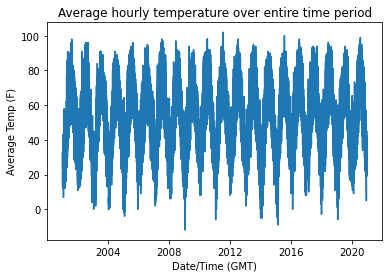

In [37]:
p = sns.lineplot(data = df_temps, x = 'Date/Time (GMT)', y = "Average Temp (F)")
p.set_title("Average hourly temperature over entire time period")
plt.show()

#### 34) [P] Now, compute the mean of the hourly average temperature for each year and plot this annual value. 

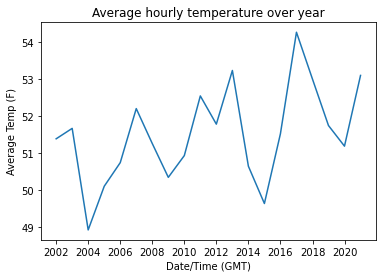

In [38]:
by_year = df_temps.resample("Y").mean()
p1 = sns.lineplot(data = by_year, x = 'Date/Time (GMT)', y = "Average Temp (F)")
p1.set_title("Average hourly temperature over year")
plt.show()